<a href="https://colab.research.google.com/github/Mike-Min/Personal-Folder/blob/main/Exploring_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Loading some libraries here
import pandas as pd
import numpy as np
# ggplot related libraries
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

### Reading in the data

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/BYUIDSconsulting/iworQ_fa22/master/data/csv/tracker_0.csv?token=GHSAT0AAAAAABYWAYVVAJKECLLTWDOVU3S2YZI6EOA")

In [23]:
df.shape

(1000000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   account_id           1000000 non-null  int64  
 1   fieldapplication_id  1000000 non-null  int64  
 2   user_id              1000000 non-null  int64  
 3   server_name          1000000 non-null  object 
 4   request_method       1000000 non-null  object 
 5   php_self             1000000 non-null  object 
 6   request_time_float   1000000 non-null  float64
 7   request_time         1000000 non-null  int64  
 8   ajaxpostc            917796 non-null   object 
 9   ajaxposta            888397 non-null   object 
 10  ajaxpostf            917796 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 83.9+ MB


In [11]:
df[['server_name']].value_counts()

server_name
PROD           998774
DEV              1219
localhost           7
dtype: int64

In [12]:
df[['request_method']].value_counts()

request_method
POST              917799
GET                82201
dtype: int64

In [13]:
df[['php_self']].value_counts()

php_self                           
AjaxCall.php                           917022
/Page/popupEdit.php                     23132
/Page/Info.php                          16475
/Page/popupSearch.php                    9771
/Page/popupInspection.php                5408
                                        ...  
/Page/Permit/PlanReviewType.php             1
/Page/EmployeeLog.php                       1
/Page/popupEquipment.php                    1
/Page/Support/CancelledAccounts.php         1
/Page/Code/webPortal.php                    1
Length: 125, dtype: int64

In [14]:
df[['ajaxpostc']].value_counts()

ajaxpostc         
Permit                454863
Wm                    209454
Code                  129839
Entity                 35395
Fleet                  33404
Ca                     16888
Req                    11806
Pave                    5366
accountLayer            5085
Accountmap              4617
user                    3378
Iworq                   1670
planedit                1165
accountMap              1079
CompanyPermit            774
Accountlayer             679
Sign                     601
WebForm                  333
mapadmin                 306
permit                   262
wm                       216
entity                   195
ca                       155
code                     145
Cc                        21
web                       21
pave                      18
WM                        15
Login                     12
fileuploadlistview        10
sign                      10
accountlayer               6
req                        5
Logo                    

In [15]:
df[['ajaxposta']].value_counts()

ajaxposta          
edit                   180190
edititem               129909
editproperty            60951
propertyrestriction     49179
note                    40362
                        ...  
Logoupload                  2
fleetsubwo                  1
treatment                   1
user                        1
arcgis                      1
Length: 94, dtype: int64

In [16]:
df[['ajaxpostf']].value_counts()

ajaxpostf                  
getEditItemHTML                87289
getNoteHtml                    35224
getEmailHTML                   33073
getFileUploadHTML              32284
getInspectionEmailHTML         31572
                               ...  
getNexPartInfoId                   1
getPaymentTypeHtml                 1
getPermitGraphSurveyHtml           1
getPermitsForEntityPrefHTML        1
putLookupColor                     1
Length: 762, dtype: int64

### Data Manipulation

In [ ]:
# Displaying all the data columns
df.columns

Index(['account_id', 'fieldapplication_id', 'user_id', 'server_name',
       'request_method', 'php_self', 'request_time_float', 'request_time',
       'ajaxpostc', 'ajaxposta', 'ajaxpostf'],
      dtype='object')

In [ ]:
# Get the top 15 most frequent variables in a column
n = 15
df['ajaxposta'].value_counts()[:n].index.tolist()

['edit',
 'edititem',
 'editproperty',
 'propertyrestriction',
 'note',
 'editasset',
 'letter',
 'fileupload',
 'grid',
 'invoice',
 'editmap',
 'item',
 'editfee',
 'property',
 'editinspection']

In [ ]:
# Filtering the data so only showing the top 15 most frequent input types
options = df['ajaxposta'].value_counts()[:n].index.tolist() 
    
# selecting rows based on condition 
df2 = df[df['ajaxposta'].isin(options)] 

In [ ]:
df2[['ajaxposta']].value_counts()

ajaxposta          
edit                   180190
edititem               129909
editproperty            60951
propertyrestriction     49179
note                    40362
editasset               39976
letter                  35198
fileupload              32888
grid                    32542
invoice                 26639
editmap                 22211
item                    21751
editfee                 21375
property                21101
editinspection          20865
dtype: int64

### Visualization

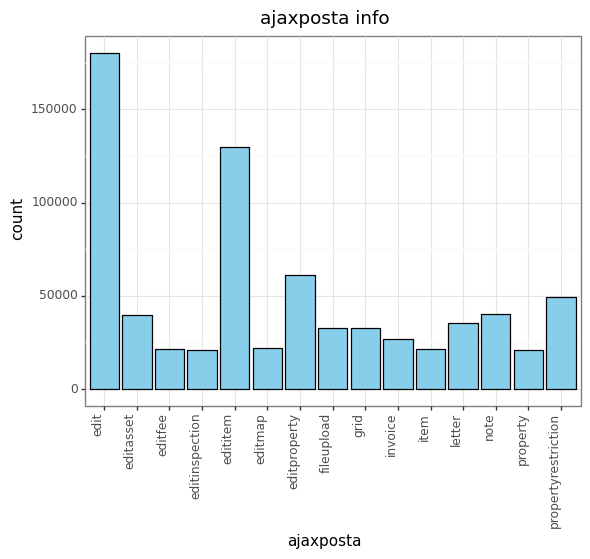

<ggplot: (8792176543285)>

In [ ]:
# Just trying to see how things are distributed
# Question: How can I put these bars in descending order?
target = 'ajaxposta'

ggplot()+\
    geom_bar(df2, aes(x=target), fill="skyblue", color="black")+\
    labs(title=target + " info")+\
    theme_bw()+\
    theme(axis_text_x=element_text(angle = 90, hjust = 1))

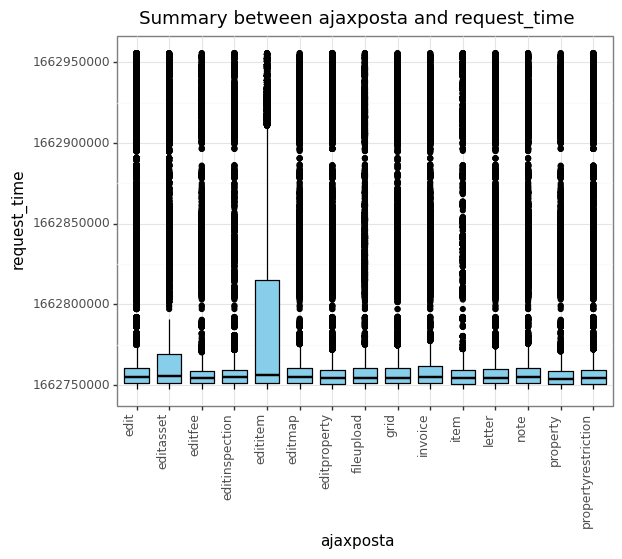

<ggplot: (8792105112617)>

In [ ]:
# Just trying to see how things are distributed
x_axis = 'ajaxposta'
y_axis = 'request_time'

ggplot()+\
    geom_boxplot(df2, aes(x=x_axis, y=y_axis), fill="skyblue", color="black")+\
    labs(title="Summary between " + x_axis + " and " + y_axis)+\
    theme_bw()+\
    theme(axis_text_x=element_text(angle = 90, hjust = 1))

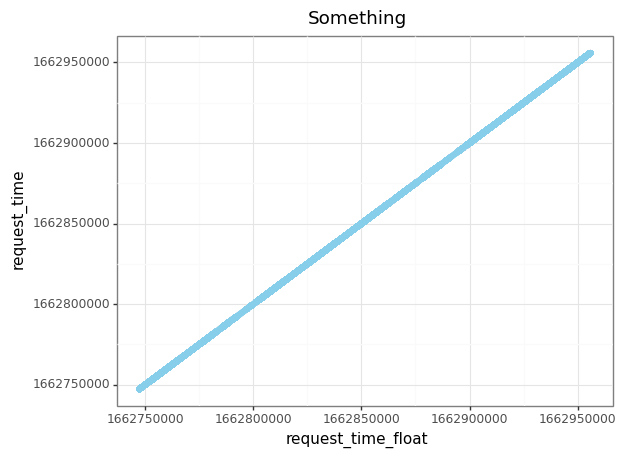

<ggplot: (8736061303845)>

In [17]:
# Useless

ggplot()+\
    geom_point(df, aes(x='request_time_float', y='request_time'), color="skyblue")+\
    labs(title="Something")+\
    theme_bw()

### Questions: What does some of the column names mean? What does some of the variable mean?

### Parquet file testing (Trying to read it)

In [21]:
import pandas as pd
link = 'tracker_0.parquet'
# read
dataset = pd.read_parquet(link)

# write
dataset.to_parquet(link)

dataset.shape

(1000000, 11)